# Walmart - Confidence Interval and CLT


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Understanding the Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [138]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [139]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [140]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [141]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [142]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [143]:
df.duplicated().sum()

0

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [147]:
col = ['Occupation', 'Marital_Status', 'Product_Category']
df[col] = df[col].astype('object')

In [148]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

### Univariate Analysis

In [149]:
df['User_ID'].nunique()

5891

In [150]:
df['Product_ID'].nunique()

3631

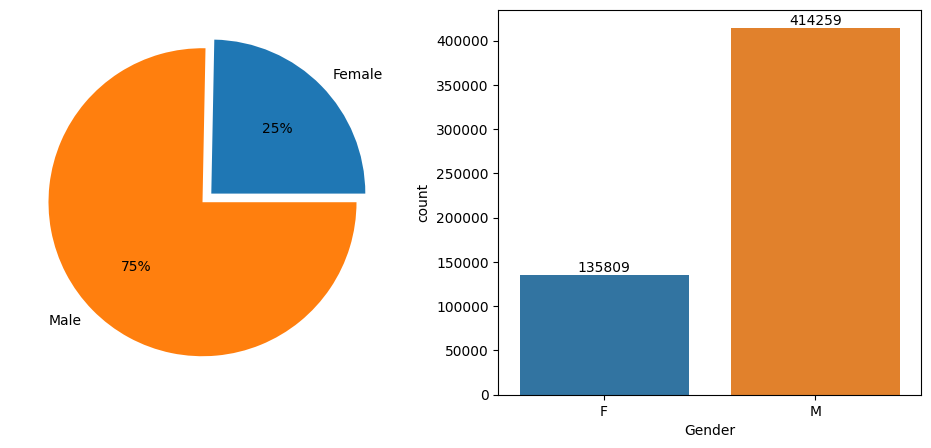

In [ ]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

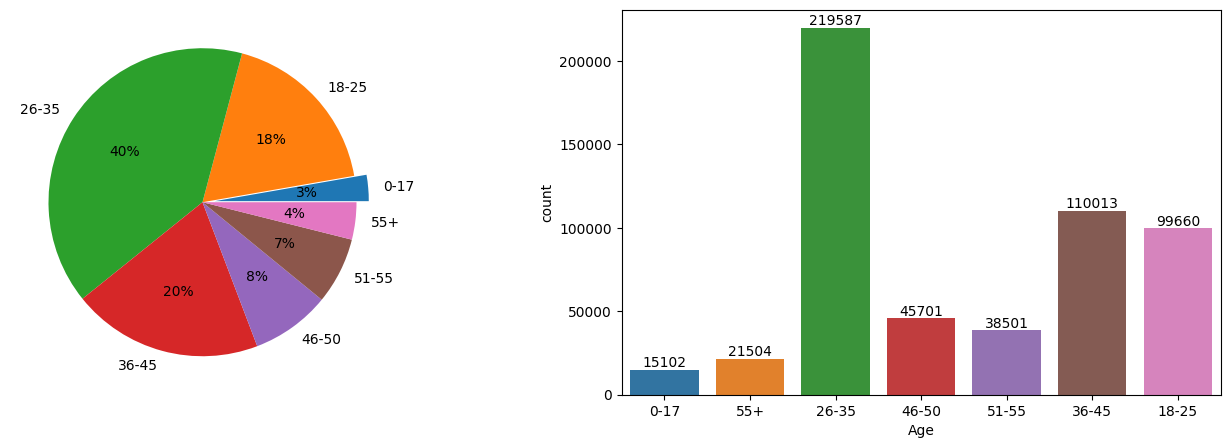

In [ ]:
plt.figure(figsize = (17,5))

plt.subplot(1,2,1)
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

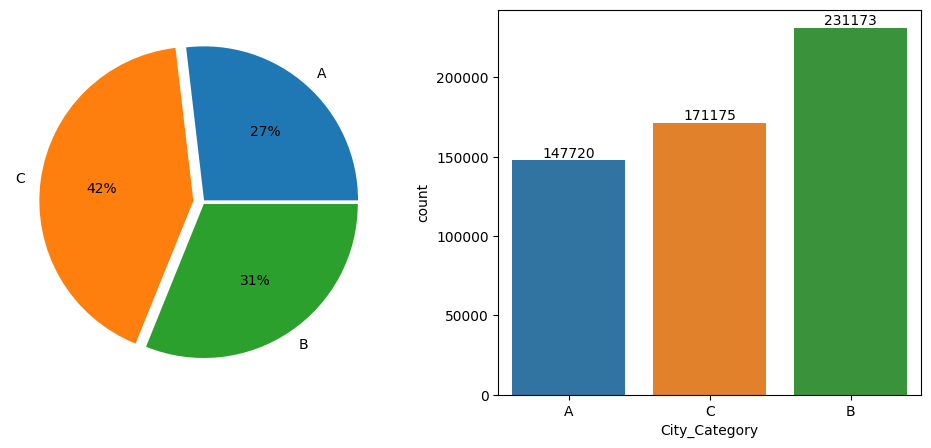

In [ ]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
labels = ['A','C','B']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

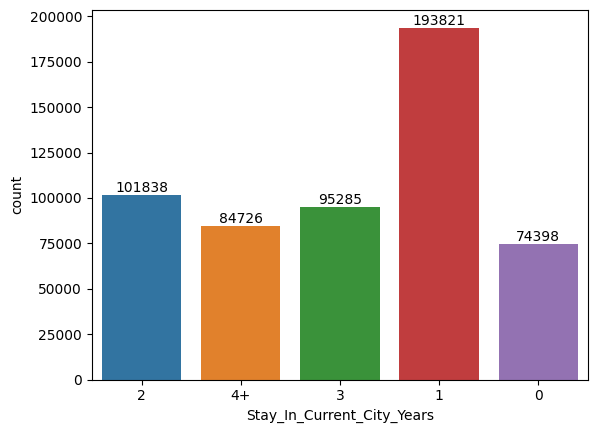

In [ ]:
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

In [ ]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

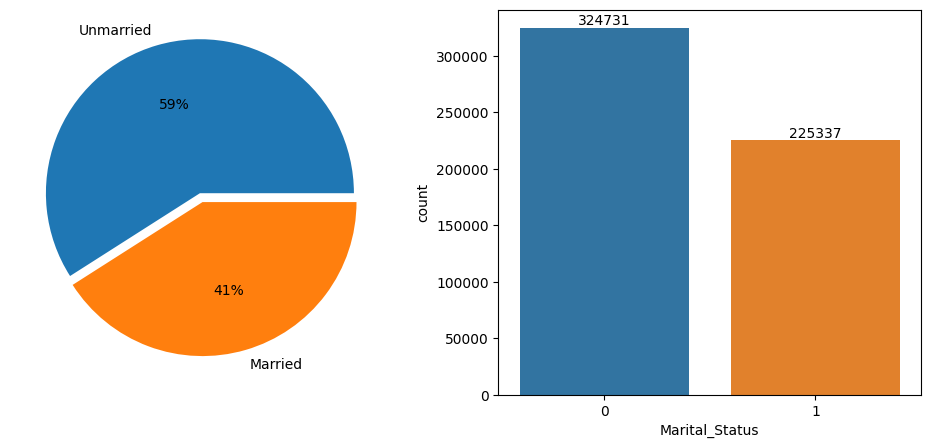

In [ ]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
labels = ['Unmarried','Married']
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = labels, explode = (0.06,0), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [ ]:
round(df['Purchase'].describe(),2)

count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

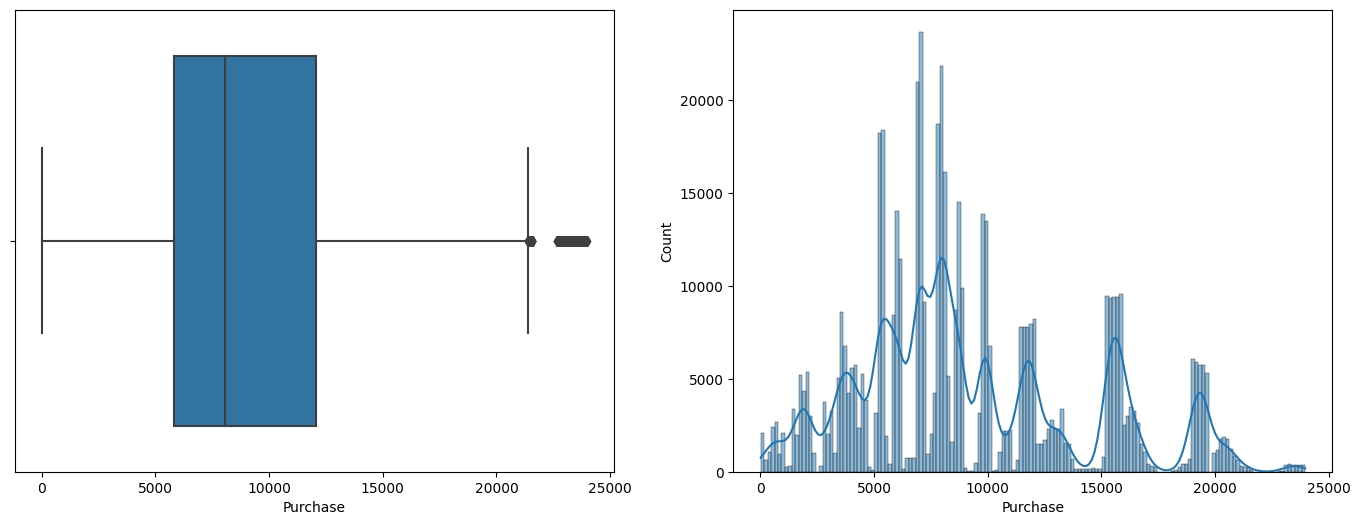

In [ ]:
plt.figure(figsize=(17, 6))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

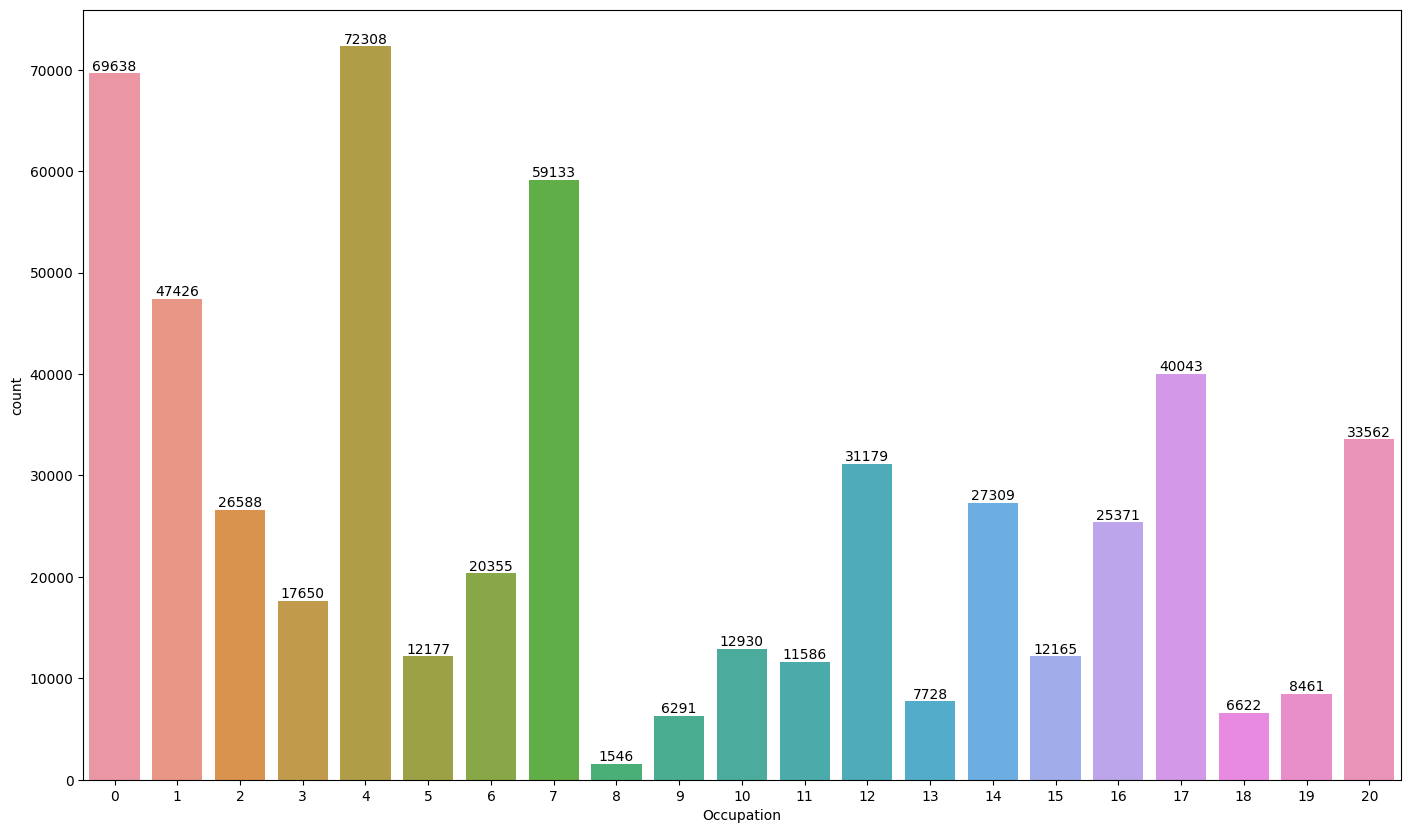

In [154]:
plt.figure(figsize=(17, 10))
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)

### Bi-variate Analysis

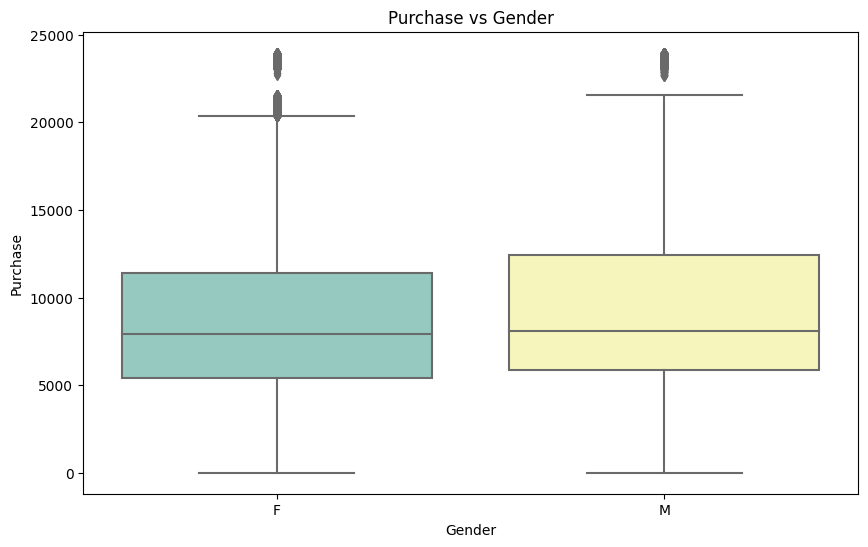

In [178]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y ='Purchase', x = 'Gender', palette = 'Set3')
plt.title('Purchase vs Gender')
plt.show()

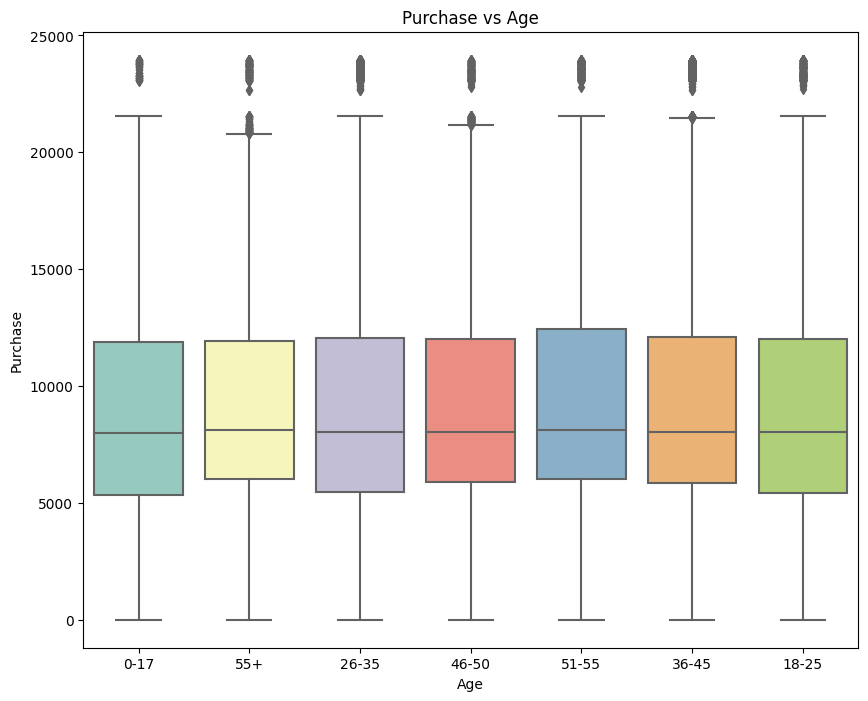

In [165]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, y ='Purchase', x = 'Age', palette = 'Set3')
plt.title('Purchase vs Age')
plt.show()

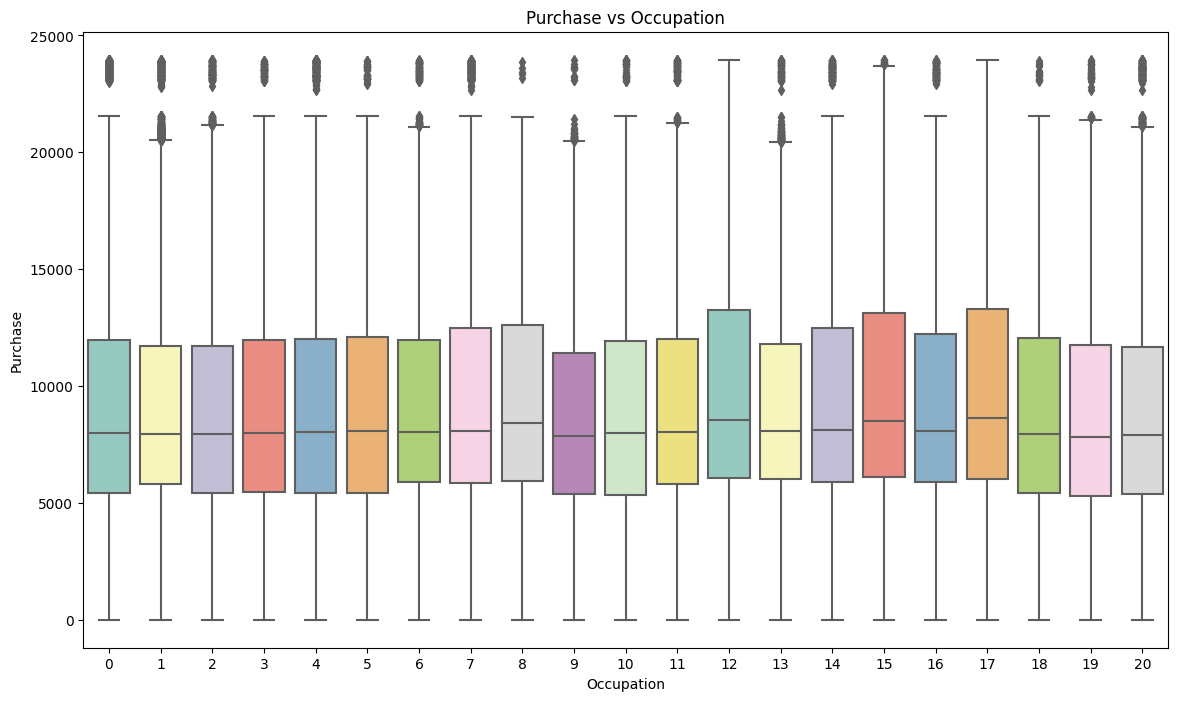

In [179]:
plt.figure(figsize = (14,8))
sns.boxplot(data = df, y ='Purchase', x = 'Occupation', palette = 'Set3')
plt.title('Purchase vs Occupation')
plt.show()

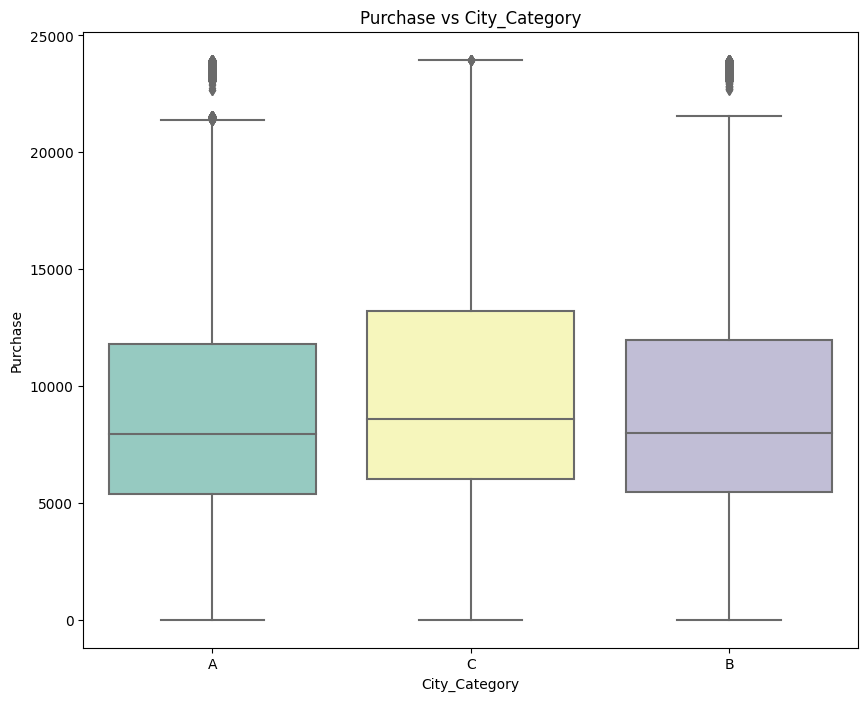

In [167]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')
plt.title('Purchase vs City_Category')
plt.show()

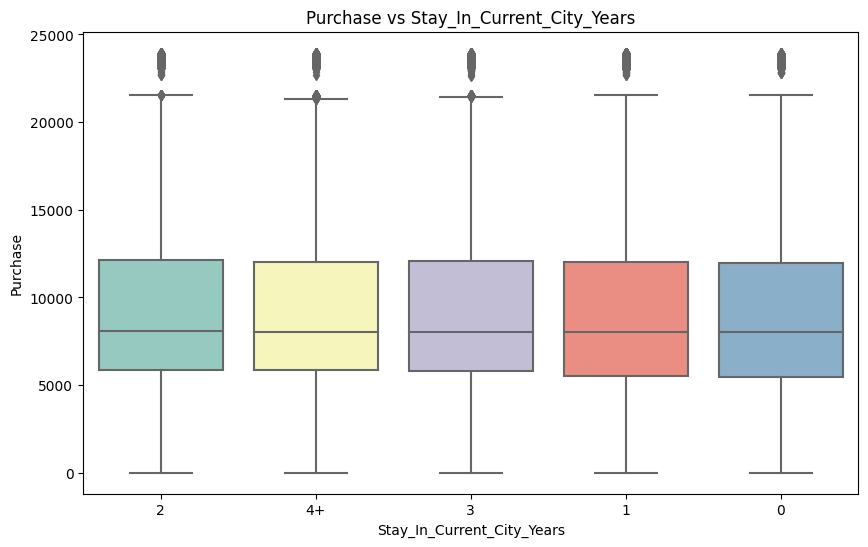

In [174]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()

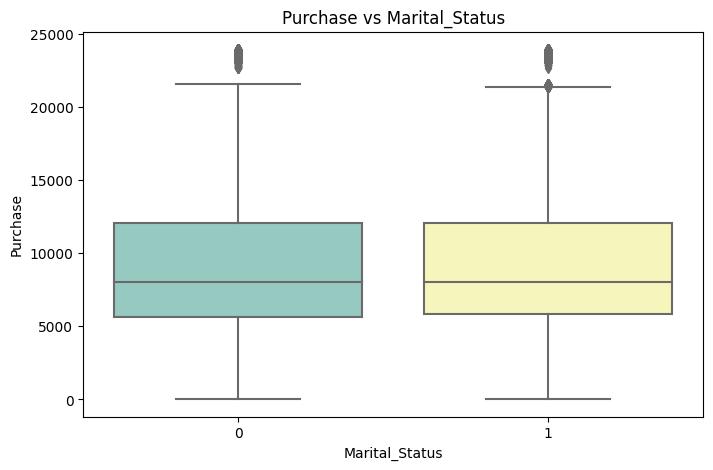

In [173]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status', palette = 'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

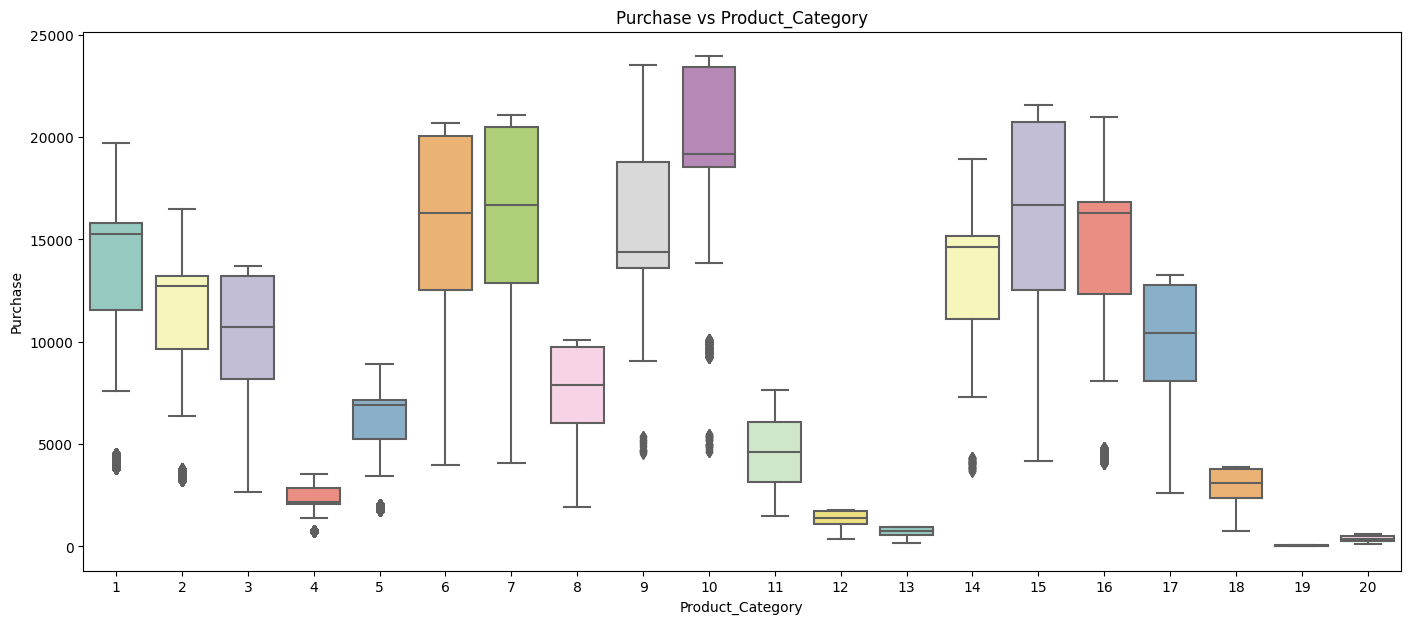

In [172]:
plt.figure(figsize = (17,7))
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

### Multi-variate Analysis

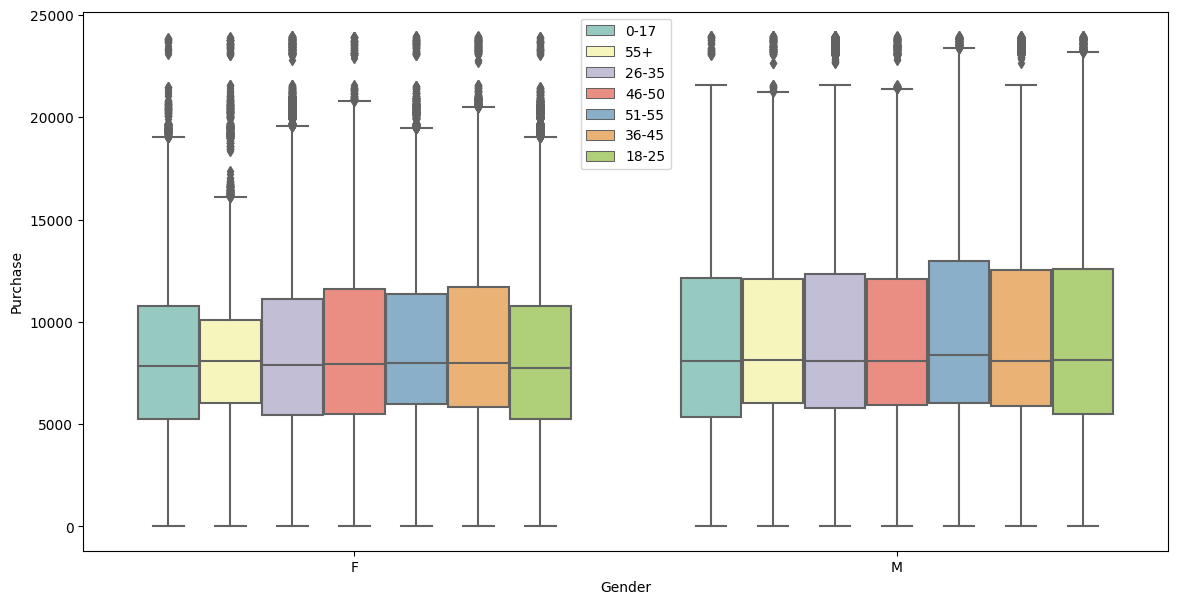

In [186]:
plt.figure(figsize = (14,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.show()

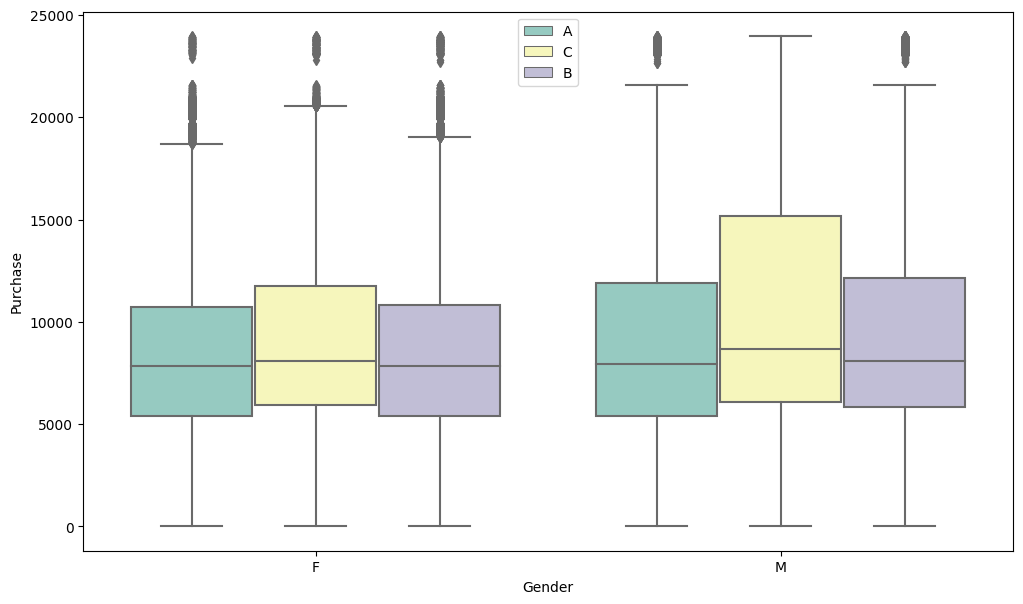

In [188]:
plt.figure(figsize = (12,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.show()

In [ ]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [ ]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100
    
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]
    
    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
       
    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n) 
    
    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)
    
    return None

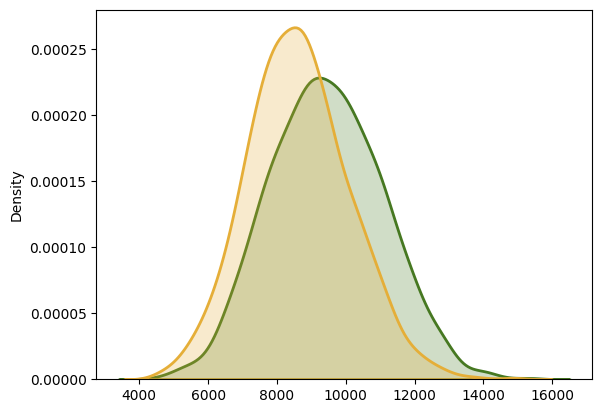

In [ ]:
bootstrap(df_male['Purchase'],df_female['Purchase'],10)

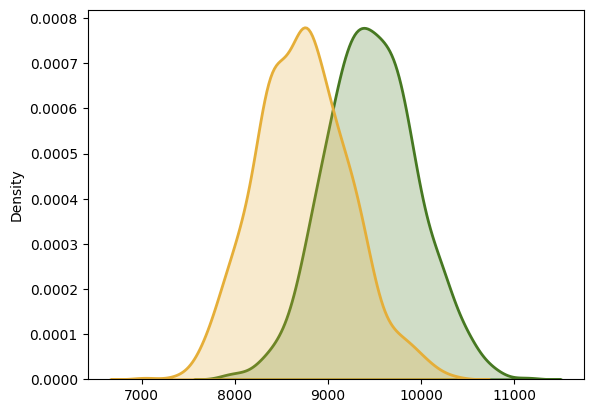

In [ ]:
bootstrap(df_male['Purchase'],df_female['Purchase'],100)

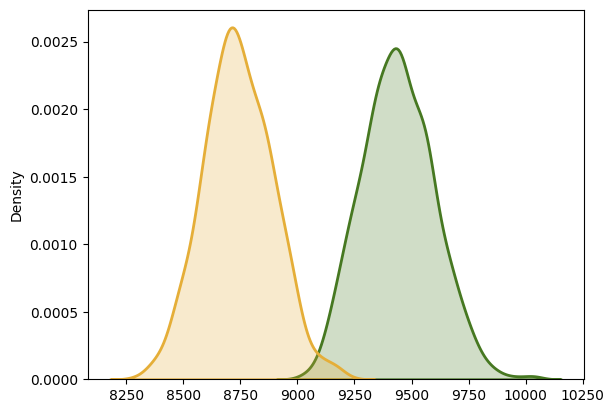

In [ ]:
bootstrap(df_male['Purchase'],df_female['Purchase'],1000)

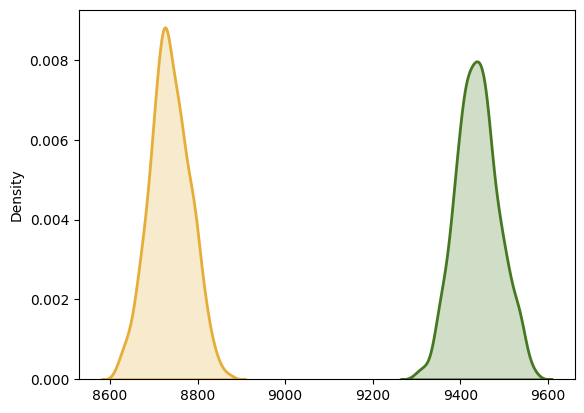

In [ ]:
bootstrap(df_male['Purchase'],df_female['Purchase'],10000)

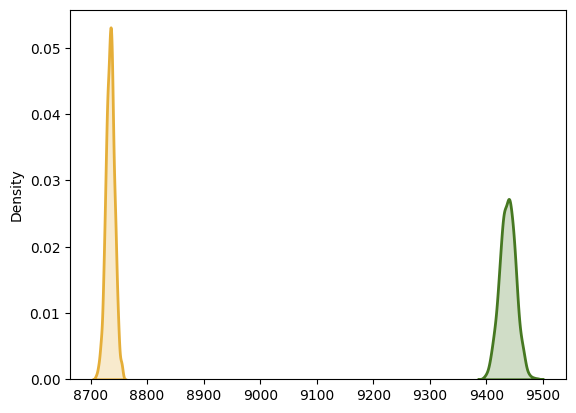

In [ ]:
bootstrap(df_male['Purchase'],df_female['Purchase'],100000)